# S/dot/S接合系におけるdot電子のスペクトル関数
$$G_{dd}(i\omega)=$$

解析接続$i\omega \to \varepsilon + i\delta$を行い遅延グリーン関数を計算できる。

## $|\varepsilon|^2 >max(|\Delta|^2_L,|\Delta|_R^2)$の場合

遅延グリーン関数は、
$$G(\varepsilon+i\delta)=\frac{\theta(|\varepsilon|^2-max(|\Delta_L|^2,|\Delta_R|^2))}{\det [\{G(\varepsilon+i\delta)\}^{-1}]}\left[\varepsilon\left(1+\frac{i\Gamma_L sgn(\varepsilon)}{\sqrt{\varepsilon^2-|\Delta_L|^2}}+\frac{i\Gamma_R sgn(\varepsilon)}{\sqrt{\varepsilon^2-|\Delta_R|^2}}\right)\boldsymbol{\hat{1}}+\xi_d \boldsymbol{\hat{\tau}}_3 +\frac{i\boldsymbol{\hat{\Delta}}_L sgn(\varepsilon)}{\sqrt{\varepsilon^2-|\Delta_L|^2}}+\frac{i\hat{\boldsymbol{\Delta}}_R sgn(\varepsilon)}{\sqrt{\varepsilon^2-|\Delta_R|^2}}\right]$$
となる。ここで、行列式は、
$$\det [\{G(\varepsilon+i\delta)\}^{-1}]=\varepsilon^2-\xi^2_d-\Gamma^2_L-\Gamma^2_R+\frac{2i\Gamma_L \varepsilon^2sgn(\varepsilon)}{\sqrt{\varepsilon^2-|\Delta_L|^2}}+\frac{2i\Gamma_R \varepsilon^2sgn(\varepsilon)}{\sqrt{\varepsilon^2-|\Delta_R|^2}}-\frac{2\Gamma_L \Gamma_R(\varepsilon^2-|\Delta_L||\Delta_R|\cos\phi)}{\sqrt{\varepsilon^2-|\Delta_L|^2}\sqrt{\varepsilon^2-|\Delta_R|^2}}$$
遅延グリーン関数の虚部をとることによりスペクトル関数を求めることができる。
$$\rho (\varepsilon)=-\frac{1}{\pi}Im{G(\varepsilon+i\delta)}$$

$\Delta_L$でスケールし、$\alpha=|\Delta_R|/|\Delta_L| \leqq1$と定めると、
遅延グリーン関数は、
$$G(\tilde{\varepsilon}+i\delta)=\frac{\theta(|\tilde\varepsilon|^2-max(1,\alpha^2))}{\det [\{G(\tilde{\varepsilon}+i\delta)\}^{-1}]}\left[\tilde{\varepsilon}\left(1+\frac{i\tilde\Gamma_L sgn(\tilde\varepsilon)}{\sqrt{\tilde\varepsilon^2-1}}+\frac{i\tilde\Gamma_R sgn(\tilde\varepsilon)}{\sqrt{\tilde\varepsilon^2-\alpha^2}}\right)\boldsymbol{\hat{1}}+\tilde{\xi}_d \boldsymbol{\hat{\tau}}_3 +\frac{i\frac{\boldsymbol{\hat\Delta}_L}{|\Delta_L|} sgn(\tilde\varepsilon)}{\sqrt{\tilde\varepsilon^2-1}}+\frac{i\frac{\boldsymbol{\hat\Delta}_R }{|\Delta|_L}sgn(\tilde\varepsilon)}{\sqrt{\tilde\varepsilon^2-\alpha^2}}\right]$$
となり、行列式は、
$$\det [\{G(\tilde\varepsilon+i\delta)\}^{-1}]=\tilde\varepsilon^2+\tilde\xi^2_d-\tilde\Gamma^2_L-\tilde\Gamma^2_R+\frac{2i\tilde\Gamma_L \tilde\varepsilon^2sgn(\tilde\varepsilon)}{\sqrt{\tilde\varepsilon^2-1}}+\frac{2i\tilde\Gamma_R \tilde\varepsilon^2sgn(\tilde\varepsilon)}{\sqrt{\tilde\varepsilon^2-\alpha^2}}-\frac{2\tilde\Gamma_L \tilde\Gamma_R(\tilde\varepsilon^2-\alpha\cos\phi)}{\sqrt{\tilde\varepsilon^2-1}\sqrt{\tilde\varepsilon^2-\alpha^2}}$$
となる。ここで、チルダつきはスケールされたものである。

In [1]:
sgn(x::Float64)=ifelse(x>0,1,-1)
DetGapOut(ε::Float64,ξ::Float64,ΓL::Float64,ΓR::Float64,α::Float64,φ::Float64)=
ε^2-ξ^2-ΓL^2-ΓR^2+im*2*ΓL*ε^2*sgn(ε)/sqrt(ε^2-1)+im*2*ΓR*ε^2*sgn(ε)/sqrt(ε^2-α^2)-2*ΓL*ΓR*(ε^2-α*cos(φ))/sqrt(ε^2-1)/sqrt(ε^2-α^2)
OutGapG11(ε::Float64,ξ::Float64,ΓL::Float64,ΓR::Float64,α::Float64,φ::Float64)=
1/DetGapOut(ε,ξ,ΓL,ΓR,α,φ)*(ε*(1+im*ΓL*sgn(ε)/sqrt(ε^2-1)+im*ΓR*sgn(ε)/sqrt(ε^2-α^2))+ξ)
function OutGapρ11(ε::Float64,ξ::Float64,ΓL::Float64,ΓR::Float64,α::Float64,φ::Float64)
    if abs(ε)^2-max(1,α^2)>0
        return -1/π*imag(OutGapG11(ε,ξ,ΓL,ΓR,α,φ))
    else
        return 0
    end
end

OutGapρ11 (generic function with 1 method)

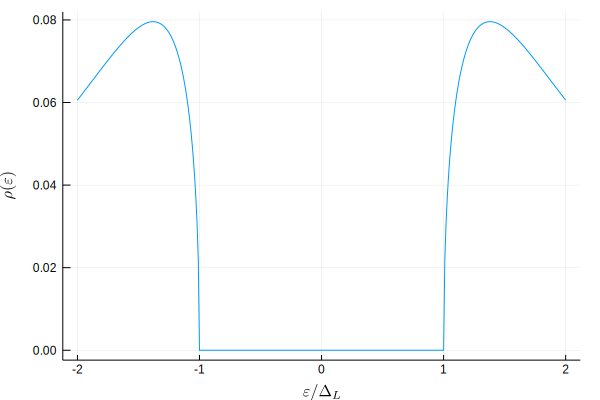

In [2]:
using Plots
ε=-2.0:0.01:2.0
plot(ε,OutGapρ11.(ε,0.0,0.5,0.5,1.0,0.0),label="")
xaxis!("\$\\varepsilon/\\Delta_L\$");yaxis!("\$\\rho(\\varepsilon)\$")

## $|\varepsilon|^2 <min(|\Delta_L|,|\Delta_R|)$の場合
$\det [\{G(\varepsilon+i\delta)\}^{-1}]=0$を満たす$\varepsilon$が存在するとき、束縛状態が存在する。

$$2F(\varepsilon)=\det [\{G(\varepsilon+i\delta)\}^{-1}]=2[F_2(\varepsilon^2)-F_1(\varepsilon^2)]$$

$$F_1(\varepsilon^2)=\frac{1}{2}\left(\xi^2_d+\Gamma^2_L+\Gamma^2_R-\varepsilon^2\right)$$

$$F_2(\varepsilon^2)=\frac{\Gamma_L \varepsilon^2}{\sqrt{|\Delta_L|^2-\varepsilon^2}}+\frac{\Gamma_R \varepsilon^2}{\sqrt{|\Delta_R|^2-\varepsilon^2}}+\frac{\Gamma_L \Gamma_R(\varepsilon^2-|\Delta_L||\Delta_R|\cos\phi)}{\sqrt{|\Delta_L|^2-\varepsilon^2}\sqrt{|\Delta_R|^2-\varepsilon^2}}$$

In [3]:
F1(ε::Float64,ΓL::Float64,ΓR::Float64,ξ::Float64)=0.5*(ξ^2+ΓL^2+ΓR^2-ε^2)
F2(ε::Float64,ΓL::Float64,ΓR::Float64,α::Float64,φ::Float64)=ΓL*ε^2/sqrt(1-ε^2)+ΓR*ε^2/sqrt(α^2-ε)+ΓR*ΓL*(ε^2-α*cos(φ))/sqrt(α^2-ε)
F(ε::Float64,ΓL::Float64,ΓR,ξ::Float64,α::Float64,φ::Float64)=F2(ε,ΓL,ΓR,α,φ)-F1(ε,ΓL,ΓR,ξ)

F (generic function with 1 method)

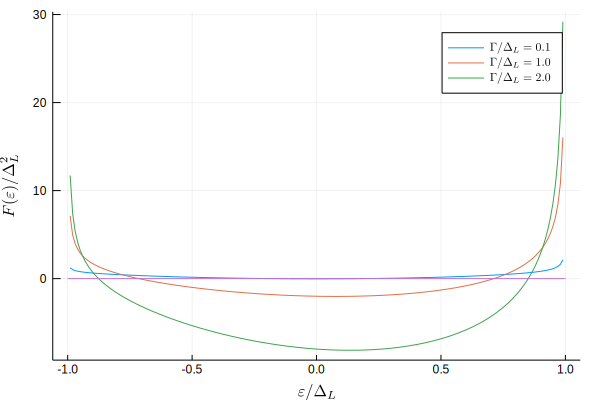

In [4]:
 ε=-0.99:0.01:0.99
plot(ε,[F.(ε,0.1,0.1,0.0,1.0,0.0),F.(ε,1.0,1.0,0.0,1.0,0.0),F.(ε,2.0,2.0,0.0,1.0,0.0)]
    ,label=["\$\\Gamma/\\Delta_L=0.1\$","\$\\Gamma/\\Delta_L=1.0\$","\$\\Gamma/\\Delta_L=2.0\$"])
plot!([-1.0,1.0],[0.0,0.0],label="")
xaxis!("\$\\varepsilon/\\Delta_L\$");yaxis!("\$F(\\varepsilon)/\\Delta_L^2\$")

In [5]:
using Interact
@manipulate for ΓL in 1.0,ΓR in 1.0,ξ in 0.0,α in 1.0,φ in 0:π/6:π
    plot(ε,F.(ε,ΓL,ΓR,ξ,α,φ))
    plot!([-1.0,1.0],[0.0,0.0])
end

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/f9178cd662af0353508a9528c2c9d109b352b0f9-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/f9178cd662af0353508a9528c2c9d109b352b0f9-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

  likely near /Users/hashimoto/.julia/packages/IJulia/4UizY/src/kernel.jl:50
in __init__ at /Users/hashimoto/.julia/packages/Interact/65HWE/src/Interact.jl


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-3abde8d9-b39c-4f6b-9fd5-3794f5d9a4c3", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["ΓL"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:attributes=>Dict{Any,Any}(:type=>"number",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}"),:placeholder=>"",:className=>"input ",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}(), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Union{Nothing, Float64}} with 2 listeners. Value:
1.0, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/hashimoto/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js", "knockout_punches"=>"/Users/hashimoto/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js", "/Users/hashimoto/.julia/packages/InteractBase/PA8ti/src/../assets/all.js", "/Users/hashimoto/.julia/packages/InteractBase/PA8ti/src/../assets/style.css", "/Users/hashimoto/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-3abde8d9-b39c-4f6b-9fd5-3794f5d9a4c3\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"value\":WebIO.getval({\"name\":\"value\",\"scope\":\"knockout-component-3abde8d9-b39c-4f6b-9fd5-3794f5d9a4c3\",\"id\":\"ob_01\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-3abde8d9-b39c-4f6b-9fd5-3794f5d9a4c3\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-3abde8d9-b39c-4f6b-9fd5-3794f5d9a4c3\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n  

束縛状態のスペクトルは
$$\hat{\rho} (\varepsilon)=\hat{a}_+\delta(\varepsilon-\omega_0)+\hat{a}_-\delta(\varepsilon+\omega_0)$$
ここで、
$$\hat{a}_\pm =\frac{1}{2K(\omega_0)}\left[\left(1+\frac{\Gamma_L}{\sqrt{|\Delta_L|^2-\omega_0^2}}+\frac{\Gamma_R}{\sqrt{|\Delta_R|^2 -\omega_0^2}}\right)\hat{\boldsymbol{1}}\pm \frac{1}{\omega_0}\left(\xi_d\hat{\boldsymbol{\tau}}_3+\frac{\Gamma_L \boldsymbol{\hat{\Delta}}_L}{\sqrt{|\Delta_L|^2-\omega^2_0}}+\frac{\Gamma_L \boldsymbol{\hat{\Delta}}_L}{\sqrt{|\Delta_L|^2-\omega^2_0}}\right)\right]$$

$$K(\omega_0^2)=1+2\left[\sum_{\nu=L,R}\Gamma_\nu \left(\frac{1}{\sqrt{|\Delta_\nu|^2-\omega_0^2}}+\frac{\omega^2_0}{2(|\Delta_\nu|^2-\omega^2_0)^{\frac{3}{2}}}\right) +\frac{\Gamma_L\Gamma_R}{\sqrt{|\Delta_L|^2-\omega^2_0}\sqrt{|\Delta_R|^2-\omega^2_0}}+\frac{\Gamma_L\Gamma_R(\omega^2_0-|\Delta_L||\Delta_R|\cos\phi}{2\sqrt{|\Delta_L|^2-\omega^2_0}\sqrt{|\Delta_R|^2-\omega^2_0}}\left(\frac{1}{|\Delta_L|^2-\omega^2_0}+\frac{1}{|\Delta_R|^2-\omega^2_0}\right)\right]$$

In [6]:
using NLsolve
function nls(func, params...; ini = [0.0])
    if typeof(ini) <: Number
        r = nlsolve((vout,vin)->vout[1]=func(vin[1],params...), [ini])
        v = r.zero[1]
    else
        r = nlsolve((vout,vin)->vout .= func(vin,params...), ini)
        v = r.zero
    end
    return v, r.f_converged
end

nls (generic function with 1 method)

In [7]:
ω0(ΓL::Float64,ΓR::Float64,ξ::Float64,α::Float64,φ::Float64)=nls(F,ΓL,ΓR,ξ,α,φ,ini=0.5)[1]

ω0 (generic function with 1 method)

In [8]:
K(ω::Float64,ΓL::Float64,ΓR,ξ::Float64,α::Float64,ϕ::Float64)=
1+2*(ΓL*(1/sqrt(1-ω^2)+ω^2/(2(1-ω^2)^(3/2)))+ΓR*(1/sqrt(α^2-ω^2)+ω^2/(2(α^2-ω^2)^(3/2)))+ΓL*ΓR/sqrt(1-ω^2)/sqrt(α^2-ω^2)
    +ΓL*ΓR*(ω^2-α*cos(ϕ))/sqrt(1-ω^2)/sqrt(α^2-ω^2)*(1/(1-ω^2)+1/(α^2-ω^2)))

K (generic function with 1 method)

In [9]:
am(ω::Float64,ΓL::Float64,ΓR,ξ::Float64,α::Float64,ϕ::Float64)=0.5/K(ω,ΓL,ΓR,ξ,α,ϕ)*(1+ΓL/sqrt(1-ω^2)+ΓR/sqrt(α^2-ω^2)-ξ/ω)
ap(ω::Float64,ΓL::Float64,ΓR,ξ::Float64,α::Float64,ϕ::Float64)=0.5/K(ω,ΓL,ΓR,ξ,α,ϕ)*(1+ΓL/sqrt(1-ω^2)+ΓR/sqrt(α^2-ω^2)+ξ/ω)

ap (generic function with 1 method)

In [36]:
function ρ11(ε::Float64,ξ::Float64,ΓL::Float64,ΓR::Float64,α::Float64,ϕ::Float64)
    ω0p=ω0(ΓL,ΓR,ξ,α,ϕ)
    
    if abs(ε)^2-max(1,α^2)>0
        return -1/π*imag(OutGapG11(ε,ξ,ΓL,ΓR,α,ϕ))
    elseif abs(ε-ω0p)<0.0005
        return ap(ω0p,ΓL,ΓR,ξ,α,ϕ)
    elseif abs(ε+ω0p)<0.0005
        return am(ω0p,ΓL,ΓR,ξ,α,ϕ)
    else
        return 0.0
    end
end


ρ11 (generic function with 1 method)

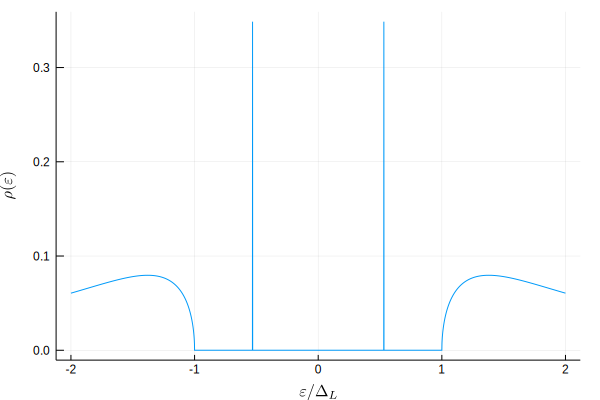

In [58]:
ε=-2.0:0.001:2.0

plot(ε,ρ11.(ε,0.0,0.5,0.5,1.0,0.0),label="")
xaxis!("\$\\varepsilon/\\Delta_L\$");yaxis!("\$\\rho(\\varepsilon)\$")


### スペクトル関数の$\Gamma$依存 at $\Gamma_L=\Gamma_R,\Delta_L=\Delta_R,\phi=0$

### スペクトル関数の$\phi$依存 at $\Gamma_L=\Gamma_R,\Delta_L=\Delta_R$

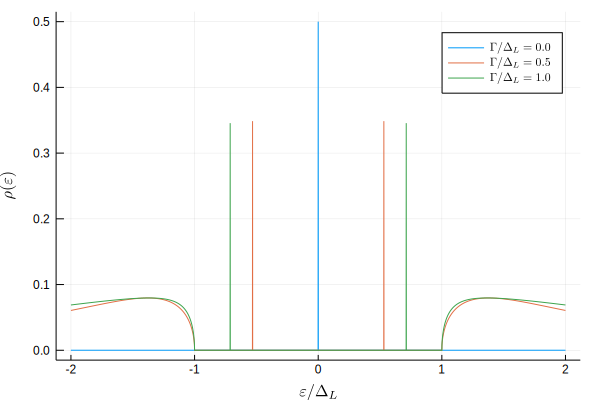

In [54]:
plot(ε,[ρ11.(ε,0.0,0.0,0.0,1.0,0.0),ρ11.(ε,0.0,0.5,0.5,1.0,0.0),ρ11.(ε,0.0,1.0,1.0,1.0,0.0)]
    ,label=["\$\\Gamma/\\Delta_L=0.0\$","\$\\Gamma/\\Delta_L=0.5\$","\$\\Gamma/\\Delta_L=1.0\$"])
xaxis!("\$\\varepsilon/\\Delta_L\$");yaxis!("\$\\rho(\\varepsilon)\$")

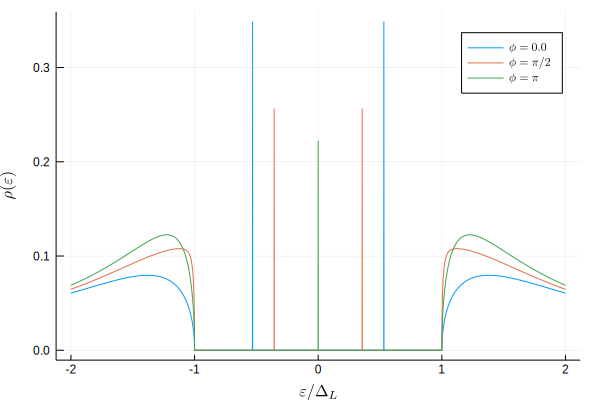

In [57]:
plot(ε,[ρ11.(ε,0.0,0.5,0.5,1.0,0.0),ρ11.(ε,0.0,0.5,0.5,1.0,pi/2),ρ11.(ε,0.0,0.5,0.5,1.0,pi/0.999)]
    ,label=["\$\\phi=0.0\$","\$\\phi=\\pi/2\$","\$\\phi=\\pi\$"])
xaxis!("\$\\varepsilon/\\Delta_L\$");yaxis!("\$\\rho(\\varepsilon)\$")